## H2O-3 AutoML Tutorial

[**Introduction to Machine Learning with H2O-3 - AutoML**](https://h2oai.github.io/tutorials/introduction-to-machine-learning-with-h2o-3-automl/)に沿ったチュートリアル

[**H2O 3 - ドキュメント**](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)  
[**Python - APIドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/index.html)

- [Initial Setup](#InitialSetup)
    - パッケージのインポート
    - H2Oクラスターの開始
    - データのロード
- [Start Experiment](#StartExperiment)
    - データの確認
    - 学習(train)/テスト(test)データセットへの分割
- [H2O AutoML Classification](#AutoMLClassification)
    - 利用変数の指定
    - AutoMLの定義と実行
    - 結果とモデル詳細の確認
- [H2O AutoML Regression](#AutoMLRegression)
    - 利用変数の指定

***

<a id='InitialSetup'></a>
### Initial Setup

In [1]:
import h2o
from h2o.automl import H2OAutoML

import matplotlib as plt
%matplotlib inline

h2o.__version__

'3.36.0.4'

In [2]:
# H2Oの開始
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.9" 2020-10-20 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.9+7-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.9+7-LTS, mixed mode)
  Starting server from /opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpexrbrdgd
  JVM stdout: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpexrbrdgd/h2o_YShimada_MBP16_started_from_python.out
  JVM stderr: /var/folders/50/glkvvhjx03g22fwy2r0tgylr0000gn/T/tmpexrbrdgd/h2o_YShimada_MBP16_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,2 months and 26 days
H2O_cluster_name:,H2O_from_python_YShimada_MBP16_tyh9j0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [3]:
# データのロード
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/H2O-3-Tutorials/loan_level_50k.csv")
loan_level.shape

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


(49930, 27)

***

<a id='StartExperiment'></a>
### Start Experiment

In [4]:
# 各変数のサマリ
loan_level.describe()

Rows:49930
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199902.0,,202404.0,10180.0,0.0,1.0,,6.0,1.0,10000.0,6.0,5.0,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.306600068478,200025.6742239135,,203023.39707590628,30705.258665299178,7.719609503855927,1.0281994792709797,,76.08864765261977,32.839337636359886,136369.67754856797,75.74523823829838,7.185977708792309,,,,,,55401.434122501305,NaN,,359.850831163629,1.629450778447913,,,,
maxs,830.0,200403.0,,203312.0,49740.0,50.0,4.0,,160.0,65.0,529000.0,100.0,10.625,,,,,,99900.0,NaN,,361.0,2.0,,,,
sigma,54.973553218043605,109.77460105160232,,110.47953133308337,11363.124822676406,12.042273590466621,0.2196233036481939,,15.062080123474086,11.165383364972822,60632.74328123592,14.86722833135055,0.5835949914330256,,,,,,29512.32285922539,NaN,,1.9974697613404824,0.4829566953626224,,,,
zeros,0,0,,0,0,31023,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,279,0,13067,0,7029,5064,0,0,2,1437,0,1,0,0,504,0,0,13,4,0,0,0,23,0,0,0,0
0,707.0,200211.0,N,202903.0,33340.0,0.0,1.0,O,60.0,57.0,136000.0,60.0,6.25,R,N,FRM,WI,SF,53000.0,F199Q1000018,C,317.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,691.0,200302.0,N,202901.0,15940.0,0.0,1.0,O,65.0,25.0,130000.0,65.0,5.875,R,N,FRM,OH,SF,44700.0,F199Q1000023,P,312.0,2.0,Other sellers,Other servicers,TRUE,FALSE
2,730.0,199903.0,N,202902.0,16620.0,30.0,1.0,O,94.0,29.0,138000.0,94.0,7.0,T,N,FRM,WV,SF,25300.0,F199Q1000037,P,360.0,2.0,Other sellers,Other servicers,TRUE,FALSE


Classificationの実施では、"DELINQUENT"をターゲット変数として扱う

In [6]:
loan_level["DELINQUENT"].table()

DELINQUENT,Count
FALSE,48118
TRUE,1812


1812/49930=0.03629（3.63%）  
不均衡データ(class inbalance)になっている

Regressionの実施では、"ORIGINAL_INTEREST_RATE"をターゲット変数として扱う

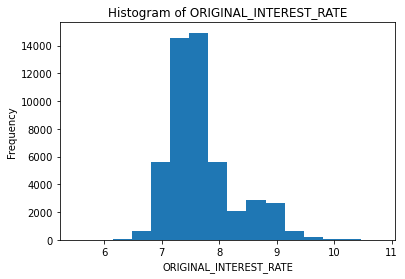

breaks,counts,mids_true,mids,widths
5.33088,nan,nan,nan,nan
5.66176,8,2.5,5.49632,0.330882
5.99265,20,2.6875,5.82721,0.330882
6.32353,57,2.875,6.15809,0.330882
6.65441,636,3,6.48897,0.330882
6.98529,5608,3.175,6.81985,0.330882
7.31618,14558,3.345,7.15074,0.330882
7.64706,14917,3.495,7.48162,0.330882
7.97794,5581,3.6625,7.8125,0.330882
8.30882,2064,3.825,8.14338,0.330882


In [7]:
loan_level["ORIGINAL_INTEREST_RATE"].hist()

In [8]:
# 学習/テストデータセットへの分割（学習 :  テスト = 80% : 20% ）
train, test = loan_level.split_frame([0.8], seed=42)
print("train:%d test:%d" % (train.nrows, test.nrows))

train:39984 test:9946


これまでのチュートリアルと異なり、trainデータで交差検証(cross varidation)を実施しハイパーパラメータのチューニングを実施する

***

<a id='AutoMLClassification'></a>
### H2O AutoML Classification

[**AutoML: Automatic Machine Learning - ドキュメント**](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)  
[**H2OAutoML - APIドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoml)

H2O AutoMLの機能
- 基本的なデータ処理（欠損処理、標準化、エンコーディング）
- 変数選択(Feature Selection)と特徴量エンジニアリング(Feature Engineering)
- ハイパーパラメータのチューニング（グリッドサーチ、ランダムサーチ）
- モデル選択
    - モデルの種類に関しては[FAQ](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoml)参照
- スタッキング
    - すべてのモデルを用いたスタッキングと各モデルファミリーの中からベストなモデルでのスタッキングが実施される（[ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/stacked-ensembles.html)、[APIドキュメント](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2ostackedensembleestimator)）

In [9]:
# 利用変数の定義
y = "DELINQUENT"
ignore = ["DELINQUENT", "PREPAID", "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "PRODUCT_TYPE"] 
x = list(set(train.names) - set(ignore))
x

['FIRST_PAYMENT_DATE',
 'ORIGINAL_COMBINED_LOAN_TO_VALUE',
 'NUMBER_OF_UNITS',
 'LOAN_SEQUENCE_NUMBER',
 'ORIGINAL_LOAN_TERM',
 'ORIGINAL_LOAN_TO_VALUE',
 'CREDIT_SCORE',
 'ORIGINAL_DEBT_TO_INCOME_RATIO',
 'ORIGINAL_INTEREST_RATE',
 'NUMBER_OF_BORROWERS',
 'PROPERTY_STATE',
 'POSTAL_CODE',
 'MATURITY_DATE',
 'PROPERTY_TYPE',
 'LOAN_PURPOSE',
 'OCCUPANCY_STATUS',
 'FIRST_TIME_HOMEBUYER_FLAG',
 'CHANNEL',
 'ORIGINAL_UPB',
 'SERVICER_NAME',
 'SELLER_NAME',
 'METROPOLITAN_STATISTICAL_AREA',
 'MORTGAGE_INSURANCE_PERCENTAGE']

In [18]:
aml = H2OAutoML(max_models=5, 
                max_runtime_secs_per_model=30, 
                nfolds=3,
                seed=42, 
                project_name='classification', 
                balance_classes=True,
                class_sampling_factors=[0.5,1.25])
aml

停止基準に関する設定 - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#required-stopping-parameters)
- [max_models](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_models.html)（作成する最大モデル数）か[max_runtime_secs](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs.html)（最大実行時間数）の設定に達すると、探索は終了する
- いずれも、最後に実施されるStacked Ensembleの処理に対しては非適用
- [max_runtime_secs_per_model](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs_per_model.html)は、各モデルの学習時間に制約を設ける
  
不均衡データ(class inbalance)に対する対処（Classificationのみ）
- balance_classes - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/balance_classes.html)、[APIドキュメント](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2o.estimators.deeplearning.H2ODeepLearningEstimator.balance_classes)（Over Sampling/Under Samplingを実施する場合、"True"を指定）
- class_sampling_factors - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/class_sampling_factors.html)、[APIドキュメント](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2o.estimators.deeplearning.H2ODeepLearningEstimator.class_sampling_factors)（Over Sampling/Under Samplingの比率。"DELINQUENT"はindex orderで、FALSE,TRUEと並んでおり、元の数に対し[0.5,1.25]倍する調整を実施(48118×0.5, 1812×1.25)）

In [19]:
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
09:12:25.517: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
09:12:57.615: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
09:13:04.639: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
09:13:10.660: _train param, Dropping unused columns: [LOAN_SEQUENCE_NUMBER]
09:13:12.674: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
09:13:43.777: _train param, Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
09:13:52.793: _train param, Dropping unused columns: [LOAN_SEQUENCE_NUMBER]
09:13:54.804: _train param, Dropping unused columns: [LOAN_SEQUENCE_NUMBER]
09:13:56.817: _train param, Dropping unused columns: [LOAN_SEQUENCE_NUMBER]
09:14:04.833: _train param, Dropping unused columns: [LOAN_SEQUENCE_NUMBER]
09:14:10.849: _train param, Dropping unused columns: [LOAN_SEQUENCE_NUMBER]
09:14:18.875: _train param, Dropping unused columns: [LOAN_SEQUENCE_NUMBER]
09:14:23.883: _trai

,,FALSE,TRUE,Error,Rate
0,FALSE,9378.0,298.0,0.0308,(298.0/9676.0)
1,TRUE,132.0,214.0,0.3815,(132.0/346.0)
2,Total,9510.0,512.0,0.0429,(430.0/10022.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.165133,0.498834,165.0
1,max f2,0.109400,0.606335,207.0
2,max f0point5,0.251514,0.524476,113.0
3,max accuracy,0.395972,0.969367,59.0
4,max precision,0.790936,1.000000,0.0
5,max recall,0.005060,1.000000,382.0
6,max specificity,0.790936,1.000000,0.0
7,max absolute_mcc,0.165133,0.487322,165.0
8,max min_per_class_accuracy,0.064374,0.881503,257.0
9,max mean_per_class_accuracy,0.043379,0.889961,286.0



Gains/Lift Table: Avg response rate:  3.45 %, avg score:  3.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010078,0.397888,19.788187,19.788187,0.683168,0.517284,0.683168,0.517284,0.199422,0.199422,1878.818749,1878.818749,0.196115
1,2,0.020056,0.289515,13.034393,16.428091,0.450000,0.336050,0.567164,0.427117,0.130058,0.329480,1203.439306,1542.809076,0.320488
2,3,0.030034,0.235798,11.586127,14.819465,0.400000,0.261664,0.511628,0.372150,0.115607,0.445087,1058.612717,1381.946498,0.429894
3,4,0.040012,0.200784,8.399942,13.218586,0.290000,0.217011,0.456359,0.333462,0.083815,0.528902,739.994220,1221.858648,0.506372
4,5,0.050090,0.166607,7.169633,12.001566,0.247525,0.183062,0.414343,0.303202,0.072254,0.601156,616.963315,1100.156599,0.570772
5,6,0.100080,0.092879,4.162680,8.086031,0.143713,0.121570,0.279163,0.212477,0.208092,0.809249,316.268042,708.603092,0.734528
6,7,0.150070,0.060563,1.503190,5.893210,0.051896,0.074120,0.203457,0.166389,0.075145,0.884393,50.319015,489.320963,0.760582
7,8,0.200060,0.044118,1.329745,4.752913,0.045908,0.051367,0.164090,0.137647,0.066474,0.950867,32.974513,375.291252,0.777655
8,9,0.300040,0.026964,0.202353,3.236564,0.006986,0.034283,0.111739,0.103204,0.020231,0.971098,-79.764748,223.656363,0.695054
9,10,0.400020,0.018479,0.144538,2.463750,0.004990,0.022316,0.085059,0.082987,0.014451,0.985549,-85.546249,146.374992,0.606467




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.030415919030537534
RMSE: 0.17440160271780053
LogLoss: 0.11898315651597247
Null degrees of freedom: 39983
Residual degrees of freedom: 39980
Null deviance: 12249.301180854927
Residual deviance: 9514.845060269286
AIC: 9522.845060269286
AUC: 0.8586207078905238
AUCPR: 0.22389898696632643
Gini: 0.7172414157810476

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13615335660245878: 


,,FALSE,TRUE,Error,Rate
0,FALSE,36857.0,1710.0,0.0443,(1710.0/38567.0)
1,TRUE,842.0,575.0,0.5942,(842.0/1417.0)
2,Total,37699.0,2285.0,0.0638,(2552.0/39984.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.136153,0.310643,194.0
1,max f2,0.062847,0.403283,265.0
2,max f0point5,0.227481,0.298426,138.0
3,max accuracy,0.645285,0.964711,17.0
4,max precision,0.756278,0.750000,5.0
5,max recall,0.001459,1.000000,397.0
6,max specificity,0.842637,0.999974,0.0
7,max absolute_mcc,0.102446,0.288208,223.0
8,max min_per_class_accuracy,0.037395,0.781228,304.0
9,max mean_per_class_accuracy,0.036497,0.785182,305.0



Gains/Lift Table: Avg response rate:  3.54 %, avg score:  3.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,0.348651,11.004771,11.004771,0.390000,0.471948,0.390000,0.471948,0.110092,0.110092,1000.477064,1000.477064,0.103765
1,2,0.020008,0.255013,7.477601,9.241186,0.265000,0.298004,0.327500,0.384976,0.074806,0.184898,647.760056,824.118560,0.170948
2,3,0.030012,0.205453,6.983797,8.488723,0.247500,0.229479,0.300833,0.333144,0.069866,0.254764,598.379675,748.872265,0.233009
3,4,0.040016,0.173063,5.079125,7.636323,0.180000,0.188026,0.270625,0.296864,0.050812,0.305575,407.912491,663.632322,0.275316
4,5,0.050020,0.149697,5.431842,7.195427,0.192500,0.160971,0.255000,0.269686,0.054340,0.359915,443.184192,619.542696,0.321281
5,6,0.100015,0.086466,3.613629,5.404976,0.128064,0.112868,0.191548,0.191296,0.180663,0.540579,261.362897,440.497580,0.456751
6,7,0.150010,0.059139,2.314981,4.375149,0.082041,0.071431,0.155052,0.151348,0.115737,0.656316,131.498106,337.514928,0.524908
7,8,0.200005,0.044057,1.609194,3.683747,0.057029,0.050925,0.130549,0.126245,0.080452,0.736768,60.919415,268.374697,0.556484
8,9,0.299995,0.027248,1.016333,2.794683,0.036018,0.034653,0.099041,0.095717,0.101623,0.838391,1.633315,179.468315,0.558177
9,10,0.400010,0.018231,0.543320,2.231772,0.019255,0.022224,0.079092,0.077342,0.054340,0.892731,-45.667998,123.177199,0.510824


validation_frameを設定しない場合（これまでのチュートリアルでは`model.train(x=x, y=y, training_frame=train, validation_frame=valid)`と設定していた）、k分割交差検証法が実施される

In [21]:
# k分割交差検証法の分割数(k)
aml.nfolds

3

[Leaderboard](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#leaderboard)の表示  
k分割交差検証法による結果が表示（validation_frameを指定した場合はホールドアウト法の結果）

In [25]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20220626_91225,0.858621,0.118983,0.223899,0.319276,0.174402,0.0304159
StackedEnsemble_AllModels_1_AutoML_1_20220626_91225,0.85856,0.118807,0.224958,0.301606,0.174261,0.030367
StackedEnsemble_AllModels_4_AutoML_1_20220626_91225,0.858403,0.118784,0.225948,0.297966,0.174172,0.030336
StackedEnsemble_BestOfFamily_2_AutoML_1_20220626_91225,0.85817,0.11891,0.22456,0.316616,0.174322,0.0303882
StackedEnsemble_BestOfFamily_5_AutoML_1_20220626_91225,0.856543,0.119133,0.225396,0.311836,0.174208,0.0303483
StackedEnsemble_AllModels_3_AutoML_1_20220626_91225,0.854096,0.121152,0.199658,0.329134,0.176227,0.0310561
GLM_1_AutoML_1_20220626_91225,0.853805,0.120899,0.205968,0.336445,0.175755,0.0308898
StackedEnsemble_BestOfFamily_4_AutoML_1_20220626_91225,0.852803,0.120943,0.20578,0.335271,0.175687,0.030866
GLM_2_AutoML_2_20220626_91910,0.85205,0.121273,0.204163,0.312967,0.17589,0.0309373
GBM_1_AutoML_1_20220626_91225,0.8449,0.122855,0.205832,0.34257,0.175874,0.0309318


個別のモデルを用い、[Stacked Ensembles](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/stacked-ensembles.html)した結果がトップとなっている

各モデルの計算時間を表示する場合  
"training_time_ms"はミリ秒での学習時間

In [26]:
from h2o.automl import get_leaderboard
lb2 = get_leaderboard(aml, extra_columns='ALL')
lb2.head(rows=lb2.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_1_20220626_91225,0.858621,0.118983,0.223899,0.319276,0.174402,0.0304159,1206,0.003217,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20220626_91225,0.85856,0.118807,0.224958,0.301606,0.174261,0.030367,1251,0.00599,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20220626_91225,0.858403,0.118784,0.225948,0.297966,0.174172,0.030336,7786,0.005898,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220626_91225,0.85817,0.11891,0.22456,0.316616,0.174322,0.0303882,1129,0.004823,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20220626_91225,0.856543,0.119133,0.225396,0.311836,0.174208,0.0303483,7509,0.004958,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20220626_91225,0.854096,0.121152,0.199658,0.329134,0.176227,0.0310561,4786,0.006601,StackedEnsemble
GLM_1_AutoML_1_20220626_91225,0.853805,0.120899,0.205968,0.336445,0.175755,0.0308898,1721,0.00069,GLM
StackedEnsemble_BestOfFamily_4_AutoML_1_20220626_91225,0.852803,0.120943,0.20578,0.335271,0.175687,0.030866,5185,0.006327,StackedEnsemble
GLM_2_AutoML_2_20220626_91910,0.85205,0.121273,0.204163,0.312967,0.17589,0.0309373,1254,0.000604,GLM
GBM_1_AutoML_1_20220626_91225,0.8449,0.122855,0.205832,0.34257,0.175874,0.0309318,857,0.001872,GBM


ベストなモデルの詳細を確認してみる

In [27]:
# ベストモデルのID
best_model_ids = lb[0,0]
best_model_ids

'StackedEnsemble_BestOfFamily_1_AutoML_1_20220626_91225'

In [28]:
# ベストモデルの取得と精度の詳細
se = h2o.get_model(best_model_ids)
se

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220626_91225

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.02410670785750351
RMSE: 0.1552633500137863
LogLoss: 0.08931263397594681
Null degrees of freedom: 10021
Residual degrees of freedom: 10018
Null deviance: 3009.503015342927
Residual deviance: 1790.182435413878
AIC: 1798.182435413878
AUC: 0.9510508988331776
AUCPR: 0.4858705805012943
Gini: 0.9021017976663552

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16513307791138013: 


,,FALSE,TRUE,Error,Rate
0,FALSE,9378.0,298.0,0.0308,(298.0/9676.0)
1,TRUE,132.0,214.0,0.3815,(132.0/346.0)
2,Total,9510.0,512.0,0.0429,(430.0/10022.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.165133,0.498834,165.0
1,max f2,0.109400,0.606335,207.0
2,max f0point5,0.251514,0.524476,113.0
3,max accuracy,0.395972,0.969367,59.0
4,max precision,0.790936,1.000000,0.0
5,max recall,0.005060,1.000000,382.0
6,max specificity,0.790936,1.000000,0.0
7,max absolute_mcc,0.165133,0.487322,165.0
8,max min_per_class_accuracy,0.064374,0.881503,257.0
9,max mean_per_class_accuracy,0.043379,0.889961,286.0



Gains/Lift Table: Avg response rate:  3.45 %, avg score:  3.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010078,0.397888,19.788187,19.788187,0.683168,0.517284,0.683168,0.517284,0.199422,0.199422,1878.818749,1878.818749,0.196115
1,2,0.020056,0.289515,13.034393,16.428091,0.450000,0.336050,0.567164,0.427117,0.130058,0.329480,1203.439306,1542.809076,0.320488
2,3,0.030034,0.235798,11.586127,14.819465,0.400000,0.261664,0.511628,0.372150,0.115607,0.445087,1058.612717,1381.946498,0.429894
3,4,0.040012,0.200784,8.399942,13.218586,0.290000,0.217011,0.456359,0.333462,0.083815,0.528902,739.994220,1221.858648,0.506372
4,5,0.050090,0.166607,7.169633,12.001566,0.247525,0.183062,0.414343,0.303202,0.072254,0.601156,616.963315,1100.156599,0.570772
5,6,0.100080,0.092879,4.162680,8.086031,0.143713,0.121570,0.279163,0.212477,0.208092,0.809249,316.268042,708.603092,0.734528
6,7,0.150070,0.060563,1.503190,5.893210,0.051896,0.074120,0.203457,0.166389,0.075145,0.884393,50.319015,489.320963,0.760582
7,8,0.200060,0.044118,1.329745,4.752913,0.045908,0.051367,0.164090,0.137647,0.066474,0.950867,32.974513,375.291252,0.777655
8,9,0.300040,0.026964,0.202353,3.236564,0.006986,0.034283,0.111739,0.103204,0.020231,0.971098,-79.764748,223.656363,0.695054
9,10,0.400020,0.018479,0.144538,2.463750,0.004990,0.022316,0.085059,0.082987,0.014451,0.985549,-85.546249,146.374992,0.606467




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.030415919030537534
RMSE: 0.17440160271780053
LogLoss: 0.11898315651597247
Null degrees of freedom: 39983
Residual degrees of freedom: 39980
Null deviance: 12249.301180854927
Residual deviance: 9514.845060269286
AIC: 9522.845060269286
AUC: 0.8586207078905238
AUCPR: 0.22389898696632643
Gini: 0.7172414157810476

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13615335660245878: 


,,FALSE,TRUE,Error,Rate
0,FALSE,36857.0,1710.0,0.0443,(1710.0/38567.0)
1,TRUE,842.0,575.0,0.5942,(842.0/1417.0)
2,Total,37699.0,2285.0,0.0638,(2552.0/39984.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.136153,0.310643,194.0
1,max f2,0.062847,0.403283,265.0
2,max f0point5,0.227481,0.298426,138.0
3,max accuracy,0.645285,0.964711,17.0
4,max precision,0.756278,0.750000,5.0
5,max recall,0.001459,1.000000,397.0
6,max specificity,0.842637,0.999974,0.0
7,max absolute_mcc,0.102446,0.288208,223.0
8,max min_per_class_accuracy,0.037395,0.781228,304.0
9,max mean_per_class_accuracy,0.036497,0.785182,305.0



Gains/Lift Table: Avg response rate:  3.54 %, avg score:  3.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,0.348651,11.004771,11.004771,0.390000,0.471948,0.390000,0.471948,0.110092,0.110092,1000.477064,1000.477064,0.103765
1,2,0.020008,0.255013,7.477601,9.241186,0.265000,0.298004,0.327500,0.384976,0.074806,0.184898,647.760056,824.118560,0.170948
2,3,0.030012,0.205453,6.983797,8.488723,0.247500,0.229479,0.300833,0.333144,0.069866,0.254764,598.379675,748.872265,0.233009
3,4,0.040016,0.173063,5.079125,7.636323,0.180000,0.188026,0.270625,0.296864,0.050812,0.305575,407.912491,663.632322,0.275316
4,5,0.050020,0.149697,5.431842,7.195427,0.192500,0.160971,0.255000,0.269686,0.054340,0.359915,443.184192,619.542696,0.321281
5,6,0.100015,0.086466,3.613629,5.404976,0.128064,0.112868,0.191548,0.191296,0.180663,0.540579,261.362897,440.497580,0.456751
6,7,0.150010,0.059139,2.314981,4.375149,0.082041,0.071431,0.155052,0.151348,0.115737,0.656316,131.498106,337.514928,0.524908
7,8,0.200005,0.044057,1.609194,3.683747,0.057029,0.050925,0.130549,0.126245,0.080452,0.736768,60.919415,268.374697,0.556484
8,9,0.299995,0.027248,1.016333,2.794683,0.036018,0.034653,0.099041,0.095717,0.101623,0.838391,1.633315,179.468315,0.558177
9,10,0.400010,0.018231,0.543320,2.231772,0.019255,0.022224,0.079092,0.077342,0.054340,0.892731,-45.667998,123.177199,0.510824


In [29]:
type(se)    # H2OStackedEnsembleEstimatorクラスとなっている

h2o.estimators.stackedensemble.H2OStackedEnsembleEstimator

In [30]:
# パラメータの確認
se.actual_params

{'model_id': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220626_91225',
 'training_frame': 'AutoML_1_20220626_91225_training_py_9_sid_82dc',
 'response_column': 'DELINQUENT',
 'validation_frame': None,
 'blending_frame': None,
 'base_models': [{'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GLM_1_AutoML_1_20220626_91225',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'GBM_1_AutoML_1_20220626_91225',
   'type': 'Key<Keyed>',
   'URL': None},
  {'__meta': {'schema_version': 3,
    'schema_name': 'KeyV3',
    'schema_type': 'Key<Keyed>'},
   'name': 'XGBoost_1_AutoML_1_20220626_91225',
   'type': 'Key<Keyed>',
   'URL': None}],
 'metalearner_algorithm': 'glm',
 'metalearner_nfolds': 5,
 'metalearner_fold_assignment': None,
 'metalearner_fold_column': None,
 'metalearner_params': '',
 'metalearner_transform': 'Logit',
 'max_runtim

スタッキングに利用したアルゴリズム(Metalearner)の確認（
[ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/metalearner_algorithm.html)、[APIドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/metalearner_algorithm.html)）

In [31]:
# Metalearnerの確認
se.actual_params['metalearner_algorithm']

'glm'

In [32]:
# Metalearnerの取得
metalearner = h2o.get_model(se.metalearner()['name'])

/opt/anaconda3/lib/python3.8/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


MetalearnerがGLMなので、その係数を表示しスタッキングに使われた各モデルの貢献度を確認してみる

In [33]:
# 係数の表示
metalearner.coef()

{'Intercept': 0.07074380943437308,
 'GLM_1_AutoML_1_20220626_91225': 0.5570215881638727,
 'GBM_1_AutoML_1_20220626_91225': 0.35143715246811597,
 'XGBoost_1_AutoML_1_20220626_91225': 0.08320680344127364}

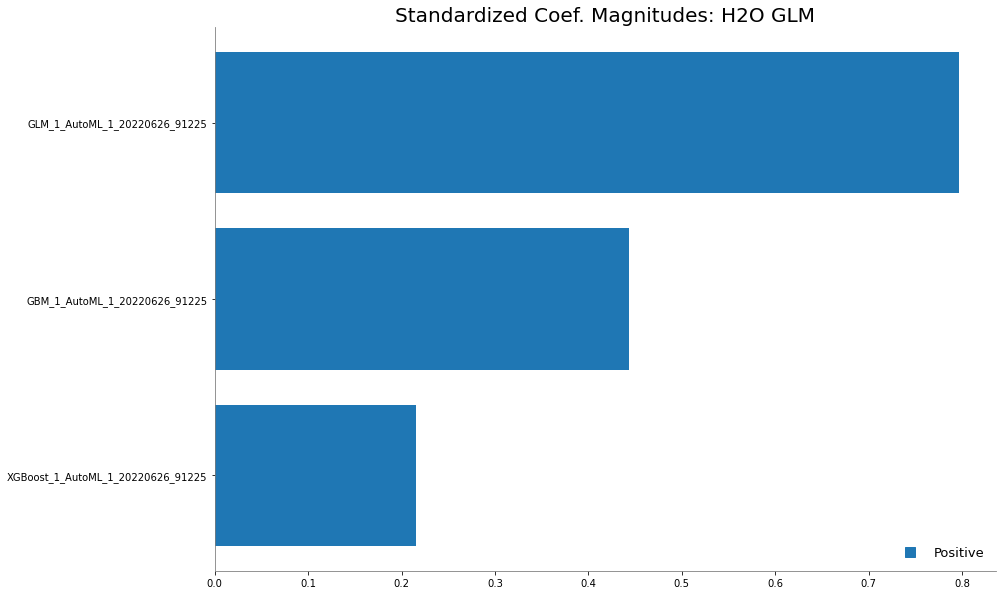

In [34]:
# 値の大きい順にプロット
metalearner.std_coef_plot()

ベストモデル(Stacked Ensemble)をtestデータで評価してみる

In [35]:
# 各精度指標
aml.leader.model_performance(test_data=test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.034305825406210376
RMSE: 0.18521831822530507
LogLoss: 0.13598065709279925
Null degrees of freedom: 9945
Residual degrees of freedom: 9942
Null deviance: 3327.7962854655475
Residual deviance: 2704.9272308899626
AIC: 2712.9272308899626
AUC: 0.8283423168625725
AUCPR: 0.21872850993410786
Gini: 0.6566846337251451

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2014556511113794: 


,,FALSE,TRUE,Error,Rate
0,FALSE,9302.0,249.0,0.0261,(249.0/9551.0)
1,TRUE,285.0,110.0,0.7215,(285.0/395.0)
2,Total,9587.0,359.0,0.0537,(534.0/9946.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.201456,0.291777,133.0
1,max f2,0.065316,0.380040,251.0
2,max f0point5,0.273411,0.324036,96.0
3,max accuracy,0.776695,0.960487,1.0
4,max precision,0.788001,1.000000,0.0
5,max recall,0.002001,1.000000,395.0
6,max specificity,0.788001,1.000000,0.0
7,max absolute_mcc,0.201456,0.264266,133.0
8,max min_per_class_accuracy,0.033659,0.762852,302.0
9,max mean_per_class_accuracy,0.033659,0.763705,302.0



Gains/Lift Table: Avg response rate:  3.97 %, avg score:  3.67 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010054,0.373432,11.834481,11.834481,0.470000,0.477519,0.470000,0.477519,0.118987,0.118987,1083.448101,1083.448101,0.113438
1,2,0.020008,0.277251,7.375885,9.616386,0.292929,0.317432,0.381910,0.397878,0.073418,0.192405,637.588544,861.638573,0.179527
2,3,0.030062,0.227815,5.035949,8.084467,0.200000,0.247671,0.321070,0.347641,0.050633,0.243038,403.594937,708.446721,0.221784
3,4,0.040016,0.186713,4.578136,7.212289,0.181818,0.206055,0.286432,0.312423,0.045570,0.288608,357.813579,621.228929,0.258872
4,5,0.050070,0.158304,3.273367,6.421341,0.130000,0.172058,0.255020,0.284237,0.032911,0.321519,227.336709,542.134106,0.282675
5,6,0.100040,0.089415,2.786491,4.605743,0.110664,0.117249,0.182915,0.200827,0.139241,0.460759,178.649110,360.574264,0.375638
6,7,0.150010,0.063143,2.482510,3.898473,0.098592,0.074570,0.154826,0.158770,0.124051,0.584810,148.251025,289.847287,0.452782
7,8,0.200080,0.044833,1.769661,3.365735,0.070281,0.053101,0.133668,0.132326,0.088608,0.673418,76.966092,236.573500,0.492913
8,9,0.300020,0.027842,1.215923,2.649611,0.048290,0.035200,0.105228,0.099972,0.121519,0.794937,21.592339,164.961143,0.515385
9,10,0.400060,0.018240,0.683270,2.157902,0.027136,0.022481,0.085700,0.080595,0.068354,0.863291,-31.673049,115.790241,0.482389


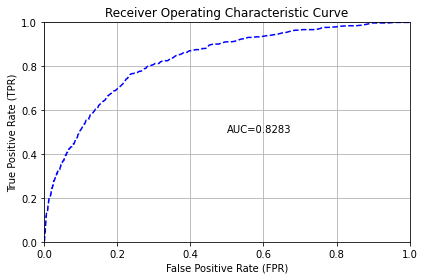

([0.0,
  0.0,
  0.00010470107842110774,
  0.00020940215684221548,
  0.00031410323526332324,
  0.00041880431368443097,
  0.0005235053921055386,
  0.0005235053921055386,
  0.0006282064705266465,
  0.0007329075489477542,
  0.0008376086273688619,
  0.0008376086273688619,
  0.0008376086273688619,
  0.0009423097057899697,
  0.0010470107842110773,
  0.001151711862632185,
  0.001256412941053293,
  0.0013611140194744007,
  0.0014658150978955084,
  0.0014658150978955084,
  0.0014658150978955084,
  0.0014658150978955084,
  0.0015705161763166161,
  0.0017799183331588316,
  0.0017799183331588316,
  0.001989320490001047,
  0.0021987226468432623,
  0.00230342372526437,
  0.00230342372526437,
  0.0024081248036854777,
  0.0024081248036854777,
  0.002512825882106586,
  0.0026175269605276936,
  0.002826929117369909,
  0.002931630195791017,
  0.002931630195791017,
  0.0031410323526332323,
  0.00324573343105434,
  0.00324573343105434,
  0.0034551355878965555,
  0.0034551355878965555,
  0.003559836666317663

In [36]:
# ROC曲線
aml.leader.model_performance(test_data=test).plot()

In [37]:
# 予測値を出力する場合
aml.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,FALSE,TRUE
FALSE,0.972486,0.027514
FALSE,0.979042,0.0209577
FALSE,0.993837,0.00616279
FALSE,0.956175,0.0438254
FALSE,0.98723,0.0127697
FALSE,0.991452,0.00854787
FALSE,0.995315,0.00468507
FALSE,0.997732,0.00226751
FALSE,0.996212,0.00378764
FALSE,0.990811,0.00918937


***

<a id='AutoMLRegression'></a>
### H2O AutoML Regression

[**AutoML: Automatic Machine Learning - ドキュメント**](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)  
[**H2OAutoML - APIドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoml)

機能概要に関しては上記[H2O AutoML Classification](#AutoMLClassification)参照

In [38]:
# 利用変数の定義
y_reg = "ORIGINAL_INTEREST_RATE"

ignore_reg = ["ORIGINAL_INTEREST_RATE", "FIRST_PAYMENT_DATE", "MATURITY_DATE", "MORTGAGE_INSURANCE_PERCENTAGE", 
              "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "LOAN_SEQUENCE_NUMBER", "PREPAID", "DELINQUENT", "PRODUCT_TYPE"] 
x_reg = list(set(train.names) - set(ignore_reg))

print("y:", y_reg, "\nx:", x_reg)

y: ORIGINAL_INTEREST_RATE 
x: ['PROPERTY_TYPE', 'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'SERVICER_NAME', 'NUMBER_OF_UNITS', 'LOAN_PURPOSE', 'ORIGINAL_LOAN_TERM', 'ORIGINAL_LOAN_TO_VALUE', 'OCCUPANCY_STATUS', 'CREDIT_SCORE', 'FIRST_TIME_HOMEBUYER_FLAG', 'CHANNEL', 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'ORIGINAL_UPB', 'NUMBER_OF_BORROWERS', 'SELLER_NAME', 'METROPOLITAN_STATISTICAL_AREA', 'POSTAL_CODE', 'PROPERTY_STATE']


In [40]:
train[x].types

{'FIRST_PAYMENT_DATE': 'int',
 'ORIGINAL_COMBINED_LOAN_TO_VALUE': 'int',
 'NUMBER_OF_UNITS': 'int',
 'LOAN_SEQUENCE_NUMBER': 'string',
 'ORIGINAL_LOAN_TERM': 'int',
 'ORIGINAL_LOAN_TO_VALUE': 'int',
 'CREDIT_SCORE': 'int',
 'ORIGINAL_DEBT_TO_INCOME_RATIO': 'int',
 'ORIGINAL_INTEREST_RATE': 'real',
 'NUMBER_OF_BORROWERS': 'int',
 'PROPERTY_STATE': 'enum',
 'POSTAL_CODE': 'int',
 'MATURITY_DATE': 'int',
 'PROPERTY_TYPE': 'enum',
 'LOAN_PURPOSE': 'enum',
 'OCCUPANCY_STATUS': 'enum',
 'FIRST_TIME_HOMEBUYER_FLAG': 'enum',
 'CHANNEL': 'enum',
 'ORIGINAL_UPB': 'int',
 'SERVICER_NAME': 'enum',
 'SELLER_NAME': 'enum',
 'METROPOLITAN_STATISTICAL_AREA': 'int',
 'MORTGAGE_INSURANCE_PERCENTAGE': 'int'}

In [50]:
aml = H2OAutoML(max_runtime_secs=60, 
                max_runtime_secs_per_model=30, 
                seed=42, 
                nfolds=3,
                preprocessing=["target_encoding"],
                project_name='regression', 
                stopping_metric="RMSE", 
                sort_metric="RMSE")

%time aml.train(x=x_reg, y=y_reg, training_frame=train)

AutoML progress: |
09:28:57.211: Target Encoding integration in AutoML is in an experimental stage, the models obtained with this feature can not yet be downloaded as MOJO for production.
09:31:56.378: New models will be added to existing leaderboard regression@@ORIGINAL_INTEREST_RATE (leaderboard frame=null) with already 22 models.
09:31:56.380: Target Encoding integration in AutoML is in an experimental stage, the models obtained with this feature can not yet be downloaded as MOJO for production.

████████████████████████████████████████████████
09:32:42.562: StackedEnsemble_AllModels_3_AutoML_4_20220626_93156 [StackedEnsemble all_2 (built with AUTO metalearner, using all AutoML models)] failed: java.lang.NullPointerException

█████████████
09:32:54.607: StackedEnsemble_AllModels_4_AutoML_4_20220626_93156 [StackedEnsemble all_3 (built with AUTO metalearner, using all AutoML models)] failed: java.lang.NullPointerException

██| (done) 100%
CPU times: user 1.17 s, sys: 83 ms, total: 1.2

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,53.0,53.0,190609.0,10.0,10.0,10.0,88.0,418.0,283.01886




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.13936397004874107
RMSE: 0.3733148403810664
MAE: 0.2707240128097366
RMSLE: 0.0442667509917026
Mean Residual Deviance: 0.13936397004874107

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.1887691696587419
RMSE: 0.43447574116254395
MAE: 0.31623578513928496
RMSLE: 0.05138873908434653
Mean Residual Deviance: 0.1887691696587419

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.316236,0.001844,0.316043,0.319156,0.314527,0.314834,0.316620
1,mean_residual_deviance,0.188769,0.002564,0.190529,0.192358,0.187632,0.186392,0.186934
2,mse,0.188769,0.002564,0.190529,0.192358,0.187632,0.186392,0.186934
3,r2,0.446630,0.007298,0.443175,0.440216,0.444005,0.459003,0.446754
4,residual_deviance,0.188769,0.002564,0.190529,0.192358,0.187632,0.186392,0.186934
5,rmse,0.434468,0.002946,0.436496,0.438587,0.433166,0.431732,0.432358
6,rmsle,0.051388,0.000304,0.051507,0.051861,0.051181,0.051112,0.051278



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-06-26 09:30:07,3.037 sec,0.0,0.584073,0.441749,0.341141
1,,2022-06-26 09:30:07,3.110 sec,5.0,0.499235,0.376367,0.249235
2,,2022-06-26 09:30:07,3.185 sec,10.0,0.451064,0.336509,0.203459
3,,2022-06-26 09:30:07,3.257 sec,15.0,0.427270,0.315727,0.182559
4,,2022-06-26 09:30:07,3.327 sec,20.0,0.410839,0.301457,0.168789
5,,2022-06-26 09:30:07,3.392 sec,25.0,0.400468,0.292895,0.160374
6,,2022-06-26 09:30:08,3.480 sec,30.0,0.393007,0.286648,0.154454
7,,2022-06-26 09:30:08,3.551 sec,35.0,0.386936,0.281702,0.149719
8,,2022-06-26 09:30:08,3.610 sec,40.0,0.382408,0.278037,0.146236
9,,2022-06-26 09:30:08,3.667 sec,45.0,0.378417,0.274706,0.143199



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,SELLER_NAME_te,17104.406250,1.000000,0.451226
1,SERVICER_NAME_te,3716.695312,0.217295,0.098049
2,ORIGINAL_UPB,2519.536621,0.147303,0.066467
3,CREDIT_SCORE,2030.563232,0.118716,0.053568
4,OCCUPANCY_STATUS,1676.273315,0.098002,0.044221
5,LOAN_PURPOSE,1667.576172,0.097494,0.043992
6,POSTAL_CODE,1559.963623,0.091202,0.041153
7,ORIGINAL_LOAN_TO_VALUE,1480.470459,0.086555,0.039056
8,PROPERTY_STATE_te,1228.935791,0.071849,0.032420
9,METROPOLITAN_STATISTICAL_AREA,1177.456909,0.068839,0.031062


停止基準に関する設定 - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#required-stopping-parameters)
- [max_models](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_models.html)（作成する最大モデル数）か[max_runtime_secs](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs.html)（最大実行時間数）の設定に達すると、探索は終了する
- いずれも、最後に実施されるStacked Ensembleの処理に対しては非適用
- [max_runtime_secs_per_model](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs_per_model.html)は、各モデルの学習時間に制約を設ける

**Target Encoding**  
Target EncodingがAutoMLのプロセスで実行可能とのこと  
[参考](https://h2oai.atlassian.net/browse/PUBDEV-7778)

In [43]:
aml.preprocessing

['target_encoding']

In [51]:
# Leaderboardの表示
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mean_residual_deviance,mse,mae,rmsle
GBM_4_AutoML_3_20220626_92857,0.434476,0.188769,0.188769,0.316236,0.0513887
GBM_3_AutoML_3_20220626_92857,0.434681,0.188948,0.188948,0.316599,0.0514099
GBM_9_AutoML_4_20220626_93156,0.435416,0.189587,0.189587,0.317095,0.0515152
GBM_2_AutoML_3_20220626_92857,0.436051,0.190141,0.190141,0.317762,0.0515648
GBM_8_AutoML_4_20220626_93156,0.436386,0.190433,0.190433,0.318119,0.0516273
GBM_1_AutoML_3_20220626_92857,0.436478,0.190513,0.190513,0.318079,0.0516259
GBM_7_AutoML_4_20220626_93156,0.437659,0.191546,0.191546,0.319556,0.0517731
GBM_5_AutoML_3_20220626_92857,0.438232,0.192047,0.192047,0.320035,0.0518294
GBM_6_AutoML_4_20220626_93156,0.438553,0.192328,0.192328,0.31969,0.0518783
GBM_10_AutoML_4_20220626_93156,0.439554,0.193207,0.193207,0.320713,0.0519934


ベストなモデルの詳細を確認してみる

In [52]:
# ベストモデルのID
best_model_id = lb[0,0]
best_model_id

'GBM_4_AutoML_3_20220626_92857'

In [53]:
# ベストモデルの取得と精度の詳細
gbm = h2o.get_model(best_model_id)
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_3_20220626_92857


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,53.0,53.0,190609.0,10.0,10.0,10.0,88.0,418.0,283.01886




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.13936397004874107
RMSE: 0.3733148403810664
MAE: 0.2707240128097366
RMSLE: 0.0442667509917026
Mean Residual Deviance: 0.13936397004874107

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.1887691696587419
RMSE: 0.43447574116254395
MAE: 0.31623578513928496
RMSLE: 0.05138873908434653
Mean Residual Deviance: 0.1887691696587419

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.316236,0.001844,0.316043,0.319156,0.314527,0.314834,0.316620
1,mean_residual_deviance,0.188769,0.002564,0.190529,0.192358,0.187632,0.186392,0.186934
2,mse,0.188769,0.002564,0.190529,0.192358,0.187632,0.186392,0.186934
3,r2,0.446630,0.007298,0.443175,0.440216,0.444005,0.459003,0.446754
4,residual_deviance,0.188769,0.002564,0.190529,0.192358,0.187632,0.186392,0.186934
5,rmse,0.434468,0.002946,0.436496,0.438587,0.433166,0.431732,0.432358
6,rmsle,0.051388,0.000304,0.051507,0.051861,0.051181,0.051112,0.051278



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-06-26 09:30:07,3.037 sec,0.0,0.584073,0.441749,0.341141
1,,2022-06-26 09:30:07,3.110 sec,5.0,0.499235,0.376367,0.249235
2,,2022-06-26 09:30:07,3.185 sec,10.0,0.451064,0.336509,0.203459
3,,2022-06-26 09:30:07,3.257 sec,15.0,0.427270,0.315727,0.182559
4,,2022-06-26 09:30:07,3.327 sec,20.0,0.410839,0.301457,0.168789
5,,2022-06-26 09:30:07,3.392 sec,25.0,0.400468,0.292895,0.160374
6,,2022-06-26 09:30:08,3.480 sec,30.0,0.393007,0.286648,0.154454
7,,2022-06-26 09:30:08,3.551 sec,35.0,0.386936,0.281702,0.149719
8,,2022-06-26 09:30:08,3.610 sec,40.0,0.382408,0.278037,0.146236
9,,2022-06-26 09:30:08,3.667 sec,45.0,0.378417,0.274706,0.143199



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,SELLER_NAME_te,17104.406250,1.000000,0.451226
1,SERVICER_NAME_te,3716.695312,0.217295,0.098049
2,ORIGINAL_UPB,2519.536621,0.147303,0.066467
3,CREDIT_SCORE,2030.563232,0.118716,0.053568
4,OCCUPANCY_STATUS,1676.273315,0.098002,0.044221
5,LOAN_PURPOSE,1667.576172,0.097494,0.043992
6,POSTAL_CODE,1559.963623,0.091202,0.041153
7,ORIGINAL_LOAN_TO_VALUE,1480.470459,0.086555,0.039056
8,PROPERTY_STATE_te,1228.935791,0.071849,0.032420
9,METROPOLITAN_STATISTICAL_AREA,1177.456909,0.068839,0.031062


In [47]:
type(gbm)

h2o.estimators.gbm.H2OGradientBoostingEstimator

In [57]:
# 主要パラメータの確認
print("ntrees = ", gbm.params['ntrees'])
print("max depth = ", gbm.params['max_depth'])
print("learn rate = ", gbm.params['learn_rate'])
print("sample rate = ", gbm.params['sample_rate'])

ntrees =  {'default': 50, 'actual': 53, 'input': 10000}
max depth =  {'default': 5, 'actual': 10, 'input': 10}
learn rate =  {'default': 0.1, 'actual': 0.1, 'input': 0.1}
sample rate =  {'default': 1.0, 'actual': 0.8, 'input': 0.8}


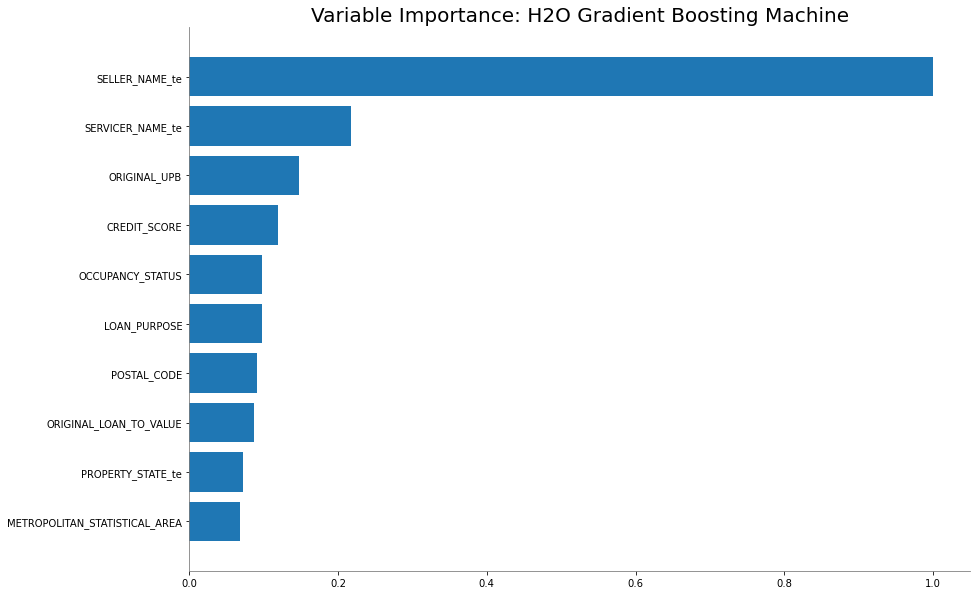

In [69]:
# 変数重要度プロット
gbm.varimp_plot()

`_te`と付いてるのが、Target Encoding実施後の特徴量

In [70]:
# testデータで評価した場合の各精度指標
gbm.model_performance(test_data=test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.18599065131162804
RMSE: 0.43126633454470803
MAE: 0.31491356015525024
RMSLE: 0.05101995807458736
Mean Residual Deviance: 0.18599065131162804


In [71]:
# Leaderboardから直接取得する場合
aml.leader.model_performance(test_data=test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.18599065131162804
RMSE: 0.43126633454470803
MAE: 0.31491356015525024
RMSLE: 0.05101995807458736
Mean Residual Deviance: 0.18599065131162804


`gbm.model_performance(test_data=test)`と`aml.leader.model_performance(test_data=test)`は一致

In [72]:
# 予測値の出力と、実績値との比較
pred = gbm.predict(test)
pred = pred.cbind(test['ORIGINAL_INTEREST_RATE'])
pred.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,ORIGINAL_INTEREST_RATE
6.81203,7.5
7.02002,6.625
7.23068,7
7.15596,7.15
7.2117,7
7.33609,7.125
6.98311,8.75
6.93009,6.5
7.0459,7
7.18484,7.25


***

In [73]:
#> H2Oクラスターの終了
h2o.cluster().shutdown()

H2O session _sid_82dc closed.
